# Hyperparameter Tuning


In [1]:
# Importing the libraries
import joblib
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)
train_data.head()

,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,bg-3:45,bg-3:30,...,insulin-0:45,insulin-0:30,insulin-0:15,insulin-0:00,bg+1:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_0,0.439216,0.473156,0.307235,0.141038,0.041261,-0.058612,0.008324,0.442543,0.943554,1.177314,...,-0.240810,-0.240906,-0.250752,-0.156803,13.4,0,0,1,0,0
p01_1,0.472507,0.306632,0.140630,0.041022,-0.058807,0.008132,0.442328,0.943434,1.177342,1.511323,...,-0.240810,-0.250527,-0.269992,-0.156803,12.8,0,0,1,0,0
p01_2,0.306055,0.140108,0.040667,-0.058994,0.007905,0.441971,0.943101,1.177183,1.511325,1.878732,...,-0.250422,-0.269768,-0.269992,-0.156803,15.5,0,0,1,0,0
p01_3,0.139603,0.040194,-0.059296,0.007683,0.441533,0.942555,1.176795,1.511110,1.878706,1.978935,...,-0.269645,-0.269768,-0.269992,-0.156803,14.8,0,0,1,0,0
p01_4,0.039731,-0.059721,0.007346,0.441087,0.941873,1.176161,1.510643,1.878430,1.978901,1.978935,...,-0.269645,-0.269768,-0.269992,-0.156803,12.7,0,0,1,0,0


In [3]:
X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

### Define a tuning function

In [4]:
def tune(tuner, X, y):
    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X=X, y=y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.model.pkl')

### Tune ExtraTrees

-----------ExtraTreesRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been 

Best hyperparameters found.


OrderedDict([('n_estimators', 100)])

RMSE: 0.013876380243331033


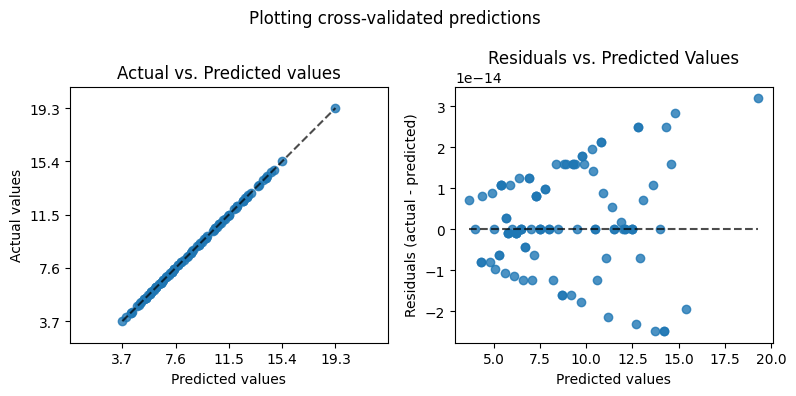

In [5]:
from src.features.tuners import ExtraTreesHyperparameterTuner

tune(ExtraTreesHyperparameterTuner(search_space='no'), X, y)